## Part 1: Exploratory Analysis and Visualization

In [ ]:
Rimpy Khokhar(50455431)
Saloni Goyal(50471481)
Dipanshu Maheshwari(50455446)

In [89]:
import numpy as np
import pandas as pd

In [55]:
# read in data file

homes_df = pd.read_csv('WestRoxbury_unprocessed.csv')

### Basic Exploratory Analysis

In [56]:
# print the data types of each column
print(homes_df.dtypes)

TOTAL_VALUE    float64
LOT_SQFT       float64
YR_BUILT         int64
LIVING_AREA    float64
FLOORS         float64
ROOMS            int64
BEDROOMS         int64
FULL_BATH        int64
HALF_BATH        int64
KITCHEN          int64
FIREPLACE        int64
REMODEL         object
dtype: object


In [57]:
# print the shape of the dataframe
print(homes_df.shape)
print(len(homes_df))
print(len(homes_df.columns))
homes_df.head() #we used this command to get the idea about columns in an excel file


(5802, 12)
5802
12


,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,1,0,None
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,1,0,Recent
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,1,0,None
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,1,None
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,1,0,None


In [58]:
# check for null values
print(homes_df['LOT_SQFT'].isnull().sum()) #We were trying to find out null values in particular column
homes_df.isnull().sum()

1


TOTAL_VALUE    0
LOT_SQFT       1
YR_BUILT       0
LIVING_AREA    2
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
KITCHEN        0
FIREPLACE      0
REMODEL        0
dtype: int64

In [59]:
# look at each category in "REMODEL"
print(homes_df['REMODEL'].value_counts())
homes_df['REMODEL'].dtype

None      4346
Recent     875
Old        581
Name: REMODEL, dtype: int64


dtype('O')

In [60]:
# look at the frequency of occurence in the "ROOMS" column
homes_df['ROOMS'].value_counts()

7     1769
6     1669
8      936
5      578
9      450
10     200
4       71
11      66
12      45
13      10
14       5
3        3
Name: ROOMS, dtype: int64

In [61]:
# look at the correlation between all of the predictors (be sure to only focus on the predictors, and not the target variable)
predictors_df = homes_df[['LOT_SQFT', 'YR_BUILT', 'LIVING_AREA', 'FLOORS', 'ROOMS','BEDROOMS', 'FULL_BATH', 'HALF_BATH', 
              'KITCHEN', 'FIREPLACE','REMODEL']]
response_df = homes_df['TOTAL_VALUE']
print(len(predictors_df.corr())) #we can observe from the correlation table that 10 columns instead of 11. 'REMODEL' isn't considered as data type of 'REMODEL' is object
predictors_df.corr()

10


,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
LOT_SQFT,1.000000,-0.068903,0.426145,0.073640,0.308398,0.254094,0.201427,0.134947,0.044518,0.181910
YR_BUILT,-0.068903,1.000000,-0.131162,-0.190453,-0.144686,-0.130411,0.073706,0.060685,0.052091,0.087234
LIVING_AREA,0.426145,-0.131162,1.000000,0.475604,0.720688,0.641065,0.438143,0.300847,0.082799,0.261992
FLOORS,0.073640,-0.190453,0.475604,1.000000,0.432856,0.431242,0.112166,0.316142,-0.114602,0.120506
ROOMS,0.308398,-0.144686,0.720688,0.432856,1.000000,0.710693,0.378274,0.282655,0.129223,0.205223
BEDROOMS,0.254094,-0.130411,0.641065,0.431242,0.710693,1.000000,0.332620,0.256852,0.085353,0.164380
FULL_BATH,0.201427,0.073706,0.438143,0.112166,0.378274,0.332620,1.000000,-0.130628,0.146650,0.140160
HALF_BATH,0.134947,0.060685,0.300847,0.316142,0.282655,0.256852,-0.130628,1.000000,-0.020071,0.176234
KITCHEN,0.044518,0.052091,0.082799,-0.114602,0.129223,0.085353,0.146650,-0.020071,1.000000,-0.009562
FIREPLACE,0.181910,0.087234,0.261992,0.120506,0.205223,0.164380,0.140160,0.176234,-0.009562,1.000000


### Data visualization

In [62]:
import matplotlib.pyplot as plt

In [63]:
%matplotlib inline

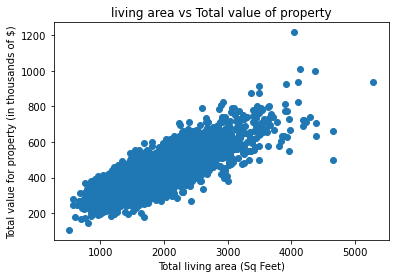

In [64]:
# plot LIVING_AREA vs. TOTAL_VALUE
plt.scatter(homes_df['LIVING_AREA'],homes_df['TOTAL_VALUE'])  
plt.xlabel("Total living area (Sq Feet)")                                    
plt.ylabel("Total value for property (in thousands of $)")             
plt.title("living area vs Total value of property")
plt.show()

## Part 2: Data preprocessing

#### Drop predictors (if you feel it's necessary)

In [65]:
print(homes_df['KITCHEN'].value_counts())
homes_df2 = homes_df.drop(['KITCHEN'], axis = 1)
homes_df2.head()


1    5713
2      89
Name: KITCHEN, dtype: int64


,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,FIREPLACE,REMODEL
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,0,None
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,0,Recent
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,0,None
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,None
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,0,None


#### Deal with NA values

In [66]:
homes_df2 = homes_df2.dropna(axis = 0, how = 'any').reset_index(drop = True)
print(homes_df2.shape)
homes_df2.isnull().sum()
# we only lost 3 observations that will not have a large impact on our model.

(5799, 11)


TOTAL_VALUE    0
LOT_SQFT       0
YR_BUILT       0
LIVING_AREA    0
FLOORS         0
ROOMS          0
BEDROOMS       0
FULL_BATH      0
HALF_BATH      0
FIREPLACE      0
REMODEL        0
dtype: int64

#### Deal with categorical variables

In [67]:
# flag categorical varibales

homes_df2.loc[:,'REMODEL'] = homes_df2.loc[:,'REMODEL'].astype('category')
print(homes_df2.dtypes)
print(homes_df2.shape)
#print(homes_df2.head(30))
homes_df3 = pd.get_dummies(homes_df2, drop_first = True)
print(homes_df3.shape)
homes_df3.head()

TOTAL_VALUE     float64
LOT_SQFT        float64
YR_BUILT          int64
LIVING_AREA     float64
FLOORS          float64
ROOMS             int64
BEDROOMS          int64
FULL_BATH         int64
HALF_BATH         int64
FIREPLACE         int64
REMODEL        category
dtype: object
(5799, 11)
(5799, 12)


,TOTAL_VALUE,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,9965.0,1880,1352.0,2.0,6,3,1,1,0,0,0
1,412.6,6590.0,1945,1976.0,2.0,10,4,2,1,0,0,1
2,330.1,7500.0,1890,1371.0,2.0,8,4,1,1,0,0,0
3,498.6,13773.0,1957,2608.0,1.0,9,5,1,1,1,0,0
4,331.5,5000.0,1910,1438.0,2.0,7,3,2,0,0,0,0


#### Normalize data

In [68]:
from sklearn import preprocessing

In [69]:
# create a dataframe with just the predictors, and another with just the values for the response variable
# predictor_df should be helpful when you normalize the predictors below, and response_df should be helpful when you partition
# your data into train and test sets (hint: you can use "y = response_df" when you partition)

predictors_df = homes_df3[['LOT_SQFT', 'YR_BUILT', 'LIVING_AREA', 'FLOORS', 'ROOMS','BEDROOMS', 'FULL_BATH', 'HALF_BATH', 'FIREPLACE','REMODEL_Old', 'REMODEL_Recent']]
response_df = homes_df3['TOTAL_VALUE']

In [70]:
# normalize predictors using standardization (i.e., force all predictors to have mean = 0  and standard deviation = 1)
z_norm = preprocessing.StandardScaler()
predictor_df_normalized = z_norm.fit_transform(predictors_df)
predictor_df_normalized = pd.DataFrame(predictor_df_normalized, columns = predictors_df.columns)
predictor_df_normalized.head(5)

,LOT_SQFT,YR_BUILT,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,1.380770,-1.576306,-0.564957,0.710481,-0.692386,-0.272264,-0.568257,0.722730,-1.309419,-0.333684,-0.421262
1,0.116790,0.229535,0.589695,0.710481,2.090597,0.909517,1.347628,0.722730,-1.309419,-0.333684,2.373818
2,0.457596,-1.298484,-0.529799,0.710481,0.699105,0.909517,-0.568257,0.722730,-1.309419,-0.333684,-0.421262
3,2.806915,0.562921,1.759149,-1.537857,1.394851,2.091298,-0.568257,0.722730,0.460173,-0.333684,-0.421262
4,-0.478685,-0.742841,-0.405822,0.710481,0.003359,-0.272264,1.347628,-1.150811,-1.309419,-0.333684,-0.421262


## Part 3: Multiple Linear Regression

### First, train and test the multiple linear regression model with sklearn

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from dmba import regressionSummary, adjusted_r2_score  # using the dmba package for perforance evaluation

In [72]:
# partition data into train and test sets
X = predictor_df_normalized
y = response_df
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [73]:
# train the LR model
linear_model = LinearRegression()
linear_model = linear_model.fit(train_X, train_y)


In [74]:
# print the coefficients
print('intercept ', linear_model.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': linear_model.coef_}))

intercept  392.6693852882081
         Predictor  coefficient
0         LOT_SQFT    23.698203
1         YR_BUILT    -0.249675
2      LIVING_AREA    51.927471
3           FLOORS    14.210192
4            ROOMS     1.349469
5         BEDROOMS    -0.548267
6        FULL_BATH     9.320577
7        HALF_BATH    10.581533
8        FIREPLACE    11.154739
9      REMODEL_Old     2.224470
10  REMODEL_Recent     9.680092


In [75]:
# print performance metrics on training set using regressionSummary()
predicted_y_training = linear_model.predict(train_X)
regressionSummary(train_y, predicted_y_training)
print(adjusted_r2_score(train_y, predicted_y_training, linear_model))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.5509
            Mean Absolute Error (MAE) : 33.8197
          Mean Percentage Error (MPE) : -1.1922
Mean Absolute Percentage Error (MAPE) : 8.8074
0.7904685986983031


In [76]:
# now, deploy the model on the test data
predicted_y_test = linear_model.predict(test_X) # these are the y_hat values
result = pd.DataFrame({'Predicted': predicted_y_test, 'Actual': test_y,
                       'Residual': test_y - predicted_y_test})
result.head()

,Predicted,Actual,Residual
1822,328.798632,291.7,-37.098632
1998,378.738919,361.1,-17.638919
5124,385.281294,371.6,-13.681294
808,282.139296,215.5,-66.639296
4032,370.853512,325.7,-45.153512


In [77]:
# how did our model perform in prediction? Use regressionSummary()
regressionSummary(test_y,predicted_y_test)
print(adjusted_r2_score(test_y, predicted_y_test, linear_model))


Regression statistics

                      Mean Error (ME) : 0.1461
       Root Mean Squared Error (RMSE) : 44.3002
            Mean Absolute Error (MAE) : 33.4362
          Mean Percentage Error (MPE) : -1.2920
Mean Absolute Percentage Error (MAPE) : 8.7690
0.8092056662919968


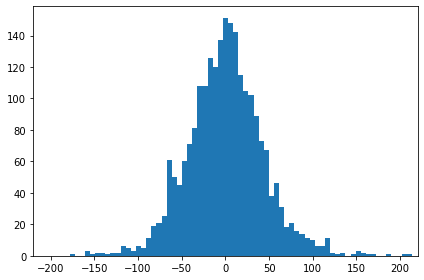

In [78]:
# let's see if our residuals are normally distributed (use matplotlib for this)
error = test_y - predicted_y_test

plt.hist(error, bins = 75)
plt.xlim([-220,220])
plt.tight_layout()
plt.show()

### Now, train and test the model with statsmodels

In [79]:
import statsmodels.api as sm

In [80]:
# add constant to the training and testing data (the predictors) and train model
train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

linear_model2 = sm.OLS(train_y, train_X).fit()


In [81]:
# print the coefficients
linear_model2.params

const             392.669385
LOT_SQFT           23.698203
YR_BUILT           -0.249675
LIVING_AREA        51.927471
FLOORS             14.210192
ROOMS               1.349469
BEDROOMS           -0.548267
FULL_BATH           9.320577
HALF_BATH          10.581533
FIREPLACE          11.154739
REMODEL_Old         2.224470
REMODEL_Recent      9.680092
dtype: float64

In [82]:
# now, look at the training performance
predicted_y_training2 = linear_model2.predict(train_X)
regressionSummary(train_y, predicted_y_training2)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 44.5509
            Mean Absolute Error (MAE) : 33.8197
          Mean Percentage Error (MPE) : -1.1922
Mean Absolute Percentage Error (MAPE) : 8.8074


In [83]:
# now, deploy the model on the test data
predicted_y_test2 = linear_model2.predict(test_X)
regressionSummary(test_y, predicted_y_test2)


Regression statistics

                      Mean Error (ME) : 0.1461
       Root Mean Squared Error (RMSE) : 44.3002
            Mean Absolute Error (MAE) : 33.4362
          Mean Percentage Error (MPE) : -1.2920
Mean Absolute Percentage Error (MAPE) : 8.7690


In [84]:
# look at the testing performance
regressionSummary(test_y,predicted_y_test)


Regression statistics

                      Mean Error (ME) : 0.1461
       Root Mean Squared Error (RMSE) : 44.3002
            Mean Absolute Error (MAE) : 33.4362
          Mean Percentage Error (MPE) : -1.2920
Mean Absolute Percentage Error (MAPE) : 8.7690


In [85]:
# look at the p-values
linear_model2.pvalues.round(4)

const             0.0000
LOT_SQFT          0.0000
YR_BUILT          0.7181
LIVING_AREA       0.0000
FLOORS            0.0000
ROOMS             0.2817
BEDROOMS          0.6292
FULL_BATH         0.0000
HALF_BATH         0.0000
FIREPLACE         0.0000
REMODEL_Old       0.0035
REMODEL_Recent    0.0000
dtype: float64

In [86]:
# drop the variables that are not significant (i.e., p>0.05)
train_X = train_X.drop(["YR_BUILT","ROOMS","BEDROOMS"], axis = 1)
test_X = test_X.drop(["YR_BUILT","ROOMS","BEDROOMS"], axis = 1)

In [87]:
# train the new model and print the performance metrics for training
linear_model3 = sm.OLS(train_y, train_X).fit()
linear_model3.params

const             392.681338
LOT_SQFT           23.727571
LIVING_AREA        52.485388
FLOORS             14.318613
FULL_BATH           9.381534
HALF_BATH          10.616834
FIREPLACE          11.146626
REMODEL_Old         2.252933
REMODEL_Recent      9.726439
dtype: float64

In [88]:
# deploy the model on the test data, and print the performance metrics for testing

predicted_y_test3 = linear_model3.predict(test_X)
regressionSummary(test_y, predicted_y_test3)


Regression statistics

                      Mean Error (ME) : 0.1162
       Root Mean Squared Error (RMSE) : 44.3082
            Mean Absolute Error (MAE) : 33.4630
          Mean Percentage Error (MPE) : -1.3004
Mean Absolute Percentage Error (MAPE) : 8.7816
